In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def clamp(df,col_lbl):
    minn=min(df[col_lbl])
    maxx=max(df[col_lbl])
    diff=maxx-minn
    df["c"+str(col_lbl)]=(df[col_lbl]-minn)/diff

def setup():
    faithful_df = pd.read_csv(
        "faithful.txt", 
        skiprows = 26,
        skipinitialspace = True,
        sep = ' ',
        names = ["eruptions", "waiting"]
    )
    clamp(faithful_df,"eruptions")
    clamp(faithful_df,"waiting")
    return faithful_df

DATA_DF=setup()
setup()

,eruptions,waiting,ceruptions,cwaiting
1,3.600,79,0.571429,0.679245
2,1.800,54,0.057143,0.207547
3,3.333,74,0.495143,0.584906
4,2.283,62,0.195143,0.358491
5,4.533,85,0.838000,0.792453
6,2.883,55,0.366571,0.226415
7,4.700,88,0.885714,0.849057
8,3.600,85,0.571429,0.792453
9,1.950,51,0.100000,0.150943
10,4.350,85,0.785714,0.792453


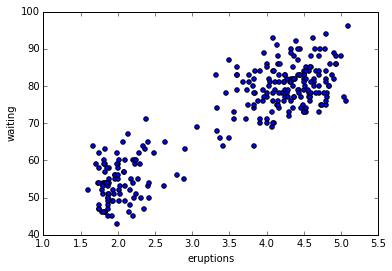

In [3]:
%matplotlib inline

def part_b():
    data_df = setup()
    plt.scatter(data_df["eruptions"], data_df["waiting"])
    plt.xlabel("eruptions")
    plt.ylabel("waiting")
        
part_b()

In [4]:
from numpy import linalg as la
def setup_initials(k,feature_vectors):
    random_indexes=np.random.choice(range(len(feature_vectors)),k,replace=False)
    return reconst_features(random_indexes,feature_vectors)

def k_means(k,feature_vectors):
    initials=setup_initials(k,feature_vectors)
#   We need to have rev dic be empty(since we have no values to start in it) 
#   but yet not be empty (or else it will be seen as the groups not changing)
#   Therefore, introduce cheating element which keeps algorithm from stoping on the first iteration
    return k_mean_help(k,feature_vectors,initials,{"CHEAT":"CHEAT"})
    
def k_mean_help(k,feature_vectors,centroids,old_rev_dic):
    label_dic={}
    rev_dic={}
    for i in range(len(feature_vectors)):
        assign_closest(i,feature_vectors[i],centroids,label_dic,rev_dic)
    
#     print("centroids: "+str(centroids))
    
    if rev_dic==old_rev_dic:
        return (label_dic,rev_dic,centroids)
#         return(rev_dic,centroids)
    
    new_centroids=recalc_centroids(feature_vectors,rev_dic)
#     print("new_centroids: "+str(new_centroids))
    return k_mean_help(k,feature_vectors,new_centroids,rev_dic)
#     print(label_dic)
#     print(rev_dic)

def assign_closest(vector_alias,feature_vector,centroids,label_dic,rev_dic):
    dists=[]
    for centroid in centroids:
        dists.append(la.norm(feature_vector-centroid))
    
    #Vector -> Which centroid its assigned to
    which_centroid=np.argmin(dists)
    label_dic[vector_alias]=which_centroid
    
    #Which centroid -> list of vectors
    if which_centroid in rev_dic:
        rev_dic[which_centroid].append(vector_alias)
    else:
        rev_dic[which_centroid]=[vector_alias]
        
#For some Idea we thought it would be a good idea to do a transform on both our centroids and feature vectors.
#instead of moving around real centroids and vectors, we move around indicies to them and transform back.
def reconst_features(feat_indexes,feature_vectors):
    features=[]
    for el in feat_indexes:
        features.append(feature_vectors[el])
    return np.array(features)   
        
def recalc_centroids(feature_vectors,rev_dic):
    new_centroids=[]
#     print("keys: "+str(rev_dic.keys()))
    for key in rev_dic.keys():
        group_features=reconst_features(rev_dic[key],feature_vectors)
        new_centroids.append(np.mean(group_features, axis=0))
    return new_centroids

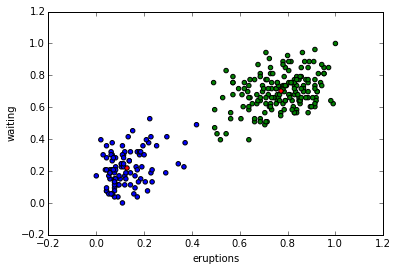

In [5]:
%matplotlib inline
import numpy as np
FEATURES=np.transpose(np.array([DATA_DF["ceruptions"].values,DATA_DF["cwaiting"].values]))
k_means_tup=k_means(2,FEATURES)
lbl_dic=k_means_tup[0]
CENTROIDS=np.transpose(np.array(k_means_tup[2]))
color_map={0:"blue",1:"green"}
color_vec=[]

for i in range(len(DATA_DF)):
    color_vec.append(color_map[lbl_dic[i]])
plt.scatter(DATA_DF["ceruptions"], DATA_DF["cwaiting"],c=color_vec)
plt.scatter(CENTROIDS[0],CENTROIDS[1],c="red")
plt.xlabel("eruptions")
plt.ylabel("waiting")    


[[{'mu': array([ 0.03224563,  0.46220213]), 'sig': array([[ 0.60621202,  0.        ],
       [ 0.        ,  0.52003258]]), 'w8': 0.5}, {'mu': array([ 0.3934294 ,  0.71566197]), 'sig': array([[ 0.84942345,  0.        ],
       [ 0.        ,  0.84341188]]), 'w8': 0.5}], [{'mu': array([ 0.49898445,  0.49603999]), 'sig': matrix([[ 0.10939459,  0.07780668],
        [ 0.07780668,  0.06761528]]), 'w8': 0.54365272891920724}, {'mu': array([ 0.5874744 ,  0.56247977]), 'sig': matrix([[ 0.09759854,  0.06862451],
        [ 0.06862451,  0.06070061]]), 'w8': 0.45634727108079282}], [{'mu': array([ 0.49451659,  0.49243953]), 'sig': matrix([[ 0.11097438,  0.07938474],
        [ 0.07938474,  0.0690007 ]]), 'w8': 0.54371402438259642}, {'mu': array([ 0.59281023,  0.56677903]), 'sig': matrix([[ 0.09471894,  0.06596658],
        [ 0.06596658,  0.05844417]]), 'w8': 0.45628597561740358}], [{'mu': array([ 0.48779375,  0.48705674]), 'sig': matrix([[ 0.11148805,  0.08018169],
        [ 0.08018169,  0.06980911]]),

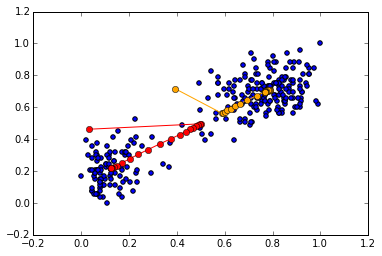

In [9]:
import random
import scipy.stats
import matplotlib.mlab
np.set_printoptions(suppress=True)
%matplotlib inline

#step one initialize gaussians
    #means
    #variances/stds
    #weights
    #how many gaussians

#create the parameters needed to make n many gaussians, choose parameters randomly
def init_gauss_rnd(n):
    gausses=[]
    for i in range(n):
        mu=np.random.uniform(0,1,2)
        sig=np.diag(np.random.uniform(0,1,2))
        w8=(1/float(n))
        gausses.append({"mu":mu,"sig":sig,"w8":w8})
    return gausses    
    
gausses=init_gauss_rnd(2)
        
def generate_weights(features,gausses):
    weights=[]
    for el in features:
        class_weight=[]
        for gauss in gausses:
            real_gauss=scipy.stats.multivariate_normal(mean=gauss["mu"], cov=gauss["sig"])
            point_prob=real_gauss.pdf(el)
            numerator=point_prob*gauss["w8"]
            denominator=generate_denom(el,gausses)
            weight=numerator/denominator
            class_weight.append(weight)
        weights.append(class_weight)
    return np.array(weights)
            
            
def generate_denom(el,gausses):
    denom_terms=[]
    for gauss in gausses:
            real_gauss=scipy.stats.multivariate_normal(mean=gauss["mu"], cov=gauss["sig"])
            prob=real_gauss.pdf(el)
            w8=gauss["w8"]
            denom_terms.append(prob*w8)
    return sum(denom_terms)

def recalc_w8(gauss_ind,weights):
        Nk=sum(np.transpose(weights)[gauss_ind])
        N=len(weights)
        w8_new=Nk/float(N)
        return w8_new
    
def recalc_means(gauss_ind,weights,features):
    #duplicate 
    wik=np.transpose(weights)[gauss_ind]
    wiks=np.transpose(np.tile(wik,(2,1)))
#     wiks=np.transpose(np.array([wik,wik]))
    product=np.multiply(wiks,features)
    Nk=sum(np.transpose(weights)[gauss_ind])
    return np.sum(product,axis=0)/float(Nk)       
    
def recalc_sig(gauss_ind,weights,features,new_means):
    summer=np.matrix([[0,0],[0,0]])
    for i in range(len(features)):
        feat=features[i]
        wik=weights[i][gauss_ind]
        diff=feat-new_means
        prod=wik*diff
        prod_matrix=np.transpose(np.matrix(prod))
        square=np.dot(prod_matrix,np.matrix(diff))
        summer=summer+square
    Nk=sum(np.transpose(weights)[gauss_ind])
    return summer/Nk

def recalc_params(gausses,weights,features):
    new_gausses=[]
    for gauss_ind in range(len(gausses)):
        new_w8=recalc_w8(gauss_ind,weights)
        new_means=recalc_means(gauss_ind,weights,features)
        new_sig=recalc_sig(gauss_ind,weights,features,new_means)
#         idontity=np.matrix([[0,1],[1,0]])
#         circular=np.multiply(new_sig,idontity)
        new_gausses.append({"mu":new_means,"w8":new_w8,"sig":new_sig})
    return new_gausses

def GMM_help(gausses,features,iters,history):
    if (iters<=0):
        return (gausses,history)
    weights=generate_weights(features,gausses)
    new_gausses=recalc_params(gausses,weights,features)
    history.append(new_gausses)
    return GMM_help(new_gausses,features,(iters-1),history)

def GMM(features,k,iters):
    gausses=init_gauss_rnd(k)
    history=[gausses]
    return GMM_help(gausses,features,iters,history)

plt.scatter(DATA_DF["ceruptions"], DATA_DF["cwaiting"],c="blue")

(gausses,history)=GMM(FEATURES,2,30)

print(history)

#     things=gausses
#     meansx= [things[0]["mu"][0]]
#     meansx2=[things[1]["mu"][0]]
#     meansy= [things[0]["mu"][1]]
#     meansy2=[things[1]["mu"][1]]
#     plt.scatter(meansx,meansy,c="red")
#     plt.plot(meansx,meansy,'-o',c="red")
#     plt.scatter(meansx2,meansy2,c="yellow")
#     plt.plot(meansx2,meansy2,'-o',c="yellow")

xs1=[]
ys1=[]
xs2=[]
ys2=[]
for gaus_package in history:
    gaus=gaus_package[0]
    gaus2=gaus_package[1]
    mean=gaus["mu"]
    mean2=gaus2["mu"]
    xs1.append(mean[0])
    ys1.append(mean[1])
    xs2.append(mean2[0])
    ys2.append(mean2[1])

# print(xs,ys)
plt.plot(xs1,ys1,'-o',c="red")
plt.plot(xs2,ys2,'-o',c="orange")
# print(things)




# weights=generate_weights(FEATURES,gausses) 
# recalc_params(gausses,weights,FEATURES)


# generate_denom(np.array([0.571429,0.679245]),gausses)
    
#step two